In [1]:
import scipy.io
import numpy as np
import pandas as pd
import csv

import matplotlib.pyplot as plt
import matplotlib

import warnings
from datascience import Table
import random
from scipy.signal import savgol_filter
import statsmodels.api as sm
from datascience.predicates import are

In [2]:
df = pd.read_csv("../processed_data/master_dataset.csv")

table = Table.from_df(df)
table

Unnamed: 0,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Aruba,ABW,2020-02-15,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,0,nan,0,0,0,0,nan,0,0,0,0,nan,0,0,0,0,0,0,0,0,0,0,0,0,2020-02-15,2,3,12,26,-2,-2
1,Aruba,ABW,2020-02-16,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,0,nan,0,0,0,0,nan,0,0,0,0,nan,0,0,0,0,0,0,0,0,0,0,0,0,2020-02-16,-1,-9,4,1,-1,2
2,Aruba,ABW,2020-02-17,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,0,nan,0,0,0,0,nan,0,0,0,0,nan,0,0,0,0,0,0,0,0,0,0,0,0,2020-02-17,-1,-1,16,-4,-20,6
3,Aruba,ABW,2020-02-18,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,0,nan,0,0,0,0,nan,0,0,0,0,nan,0,0,0,0,0,0,0,0,0,0,0,0,2020-02-18,-2,-5,8,2,-13,4
4,Aruba,ABW,2020-02-19,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,0,nan,0,0,0,0,nan,0,0,0,0,nan,0,0,0,0,0,0,0,0,0,0,0,0,2020-02-19,1,-8,3,4,-14,4
5,Aruba,ABW,2020-02-20,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,0,nan,0,0,0,0,nan,0,0,0,0,nan,0,0,0,0,0,0,0,0,0,0,0,0,2020-02-20,4,-1,0,29,-13,1
6,Aruba,ABW,2020-02-21,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,0,nan,0,0,0,0,nan,0,0,0,0,nan,0,0,0,0,0,0,0,0,0,0,0,0,2020-02-21,7,9,9,1,-15,1
7,Aruba,ABW,2020-02-22,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,0,nan,0,0,0,0,nan,0,0,0,0,nan,0,0,0,0,0,0,0,0,0,0,0,0,2020-02-22,-2,10,-4,13,-6,-2
8,Aruba,ABW,2020-02-23,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,0,nan,0,0,0,0,nan,0,0,0,0,nan,0,0,0,0,0,0,0,0,0,0,0,0,2020-02-23,14,-15,21,16,-8,-5
9,Aruba,ABW,2020-02-24,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,nan,0,0,nan,0,0,0,0,nan,0,0,0,0,nan,0,0,0,0,0,0,0,0,0,0,0,0,2020-02-24,-23,-30,24,-18,-62,18


In [3]:
df.columns

Index(['Unnamed: 0', 'CountryName', 'CountryCode', 'Date', 'C1_School closing',
       'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events',
       'C3_Flag', 'C4_Restrictions on gatherings', 'C4_Flag',
       'C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements',
       'C6_Flag', 'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'Conta

greatest dec: 29
first case: 27
containment+health imp: 24
economic imp: 46
overall imp: 24


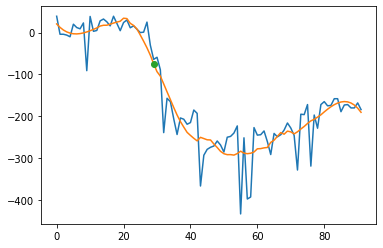

In [4]:
#mobility aggregate
mob = table.where("CountryName", "Aruba")[44]
for i in range(45, 50):
    mob += table.where("CountryName", "Aruba")[i]

mob_sg = savgol_filter(mob, 25, 3)
plt.plot(np.arange(len(mob)), mob)
plt.plot(np.arange(len(mob)), mob_sg)
plt.plot(np.argmin(np.gradient(mob_sg, 1)), mob_sg[np.argmin(np.gradient(mob_sg, 1))], marker = 'o')

print("greatest dec: " + str(np.argmin(np.gradient(mob_sg, 1))))

print("first case: " + str(np.nonzero(table.where("CountryName", "Aruba")['ConfirmedCases'])[0][0]))

print("containment+health imp: " + str(np.nonzero(table.where("CountryName", "Aruba")['ContainmentHealthIndexForDisplay'])[0][0]))

print("economic imp: " + str(np.nonzero(table.where("CountryName", "Aruba")['EconomicSupportIndexForDisplay'])[0][0]))

print("overall imp: " + str(np.nonzero(table.where("CountryName", "Aruba")['GovernmentResponseIndexForDisplay'])[0][0]))


In [5]:
t = table.where("CountryName", "Aruba")['C2_Workplace closing']
t[t == 0] = np.nan
mean = np.nanmean(t)
mean

2.6315789473684212

In [6]:
print(np.unique(table.where("CountryName", "Aruba")['C1_School closing']))
print(np.unique(table.where("CountryName", "Aruba")['C2_Workplace closing']))
print(np.unique(table.where("CountryName", "Aruba")['C3_Cancel public events']))
print(np.unique(table.where("CountryName", "Aruba")['C4_Restrictions on gatherings']))
print(np.unique(table.where("CountryName", "Aruba")['C5_Close public transport']))
print(np.unique(table.where("CountryName", "Aruba")['C6_Stay at home requirements']))
print(np.unique(table.where("CountryName", "Aruba")['C7_Restrictions on internal movement']))
print(np.unique(table.where("CountryName", "Aruba")['C8_International travel controls']))
print(np.unique(table.where("CountryName", "Aruba")['E1_Income support']))
print(np.unique(table.where("CountryName", "Aruba")['E2_Debt/contract relief']))
print(np.unique(table.where("CountryName", "Aruba")['E3_Fiscal measures']))
print(np.unique(table.where("CountryName", "Aruba")['E4_International support']))
print(np.unique(table.where("CountryName", "Aruba")['H1_Public information campaigns']))
print(np.unique(table.where("CountryName", "Aruba")['H2_Testing policy']))
print(np.unique(table.where("CountryName", "Aruba")['H3_Contact tracing']))
print(np.unique(table.where("CountryName", "Aruba")['H4_Emergency investment in healthcare']))
print(np.unique(table.where("CountryName", "Aruba")['H5_Investment in vaccines']))

[0. 3.]
[0. 2. 3.]
[0. 2.]
[0. 4.]
[0.]
[0. 1. 2. 3.]
[0. 2.]
[0. 3. 4.]
[0. 2.]
[0.]
[0.]
[0.]
[0. 2.]
[0. 1.]
[0. 1.]
[0.]
[0.]


In [7]:
countries = df['CountryName'].unique()

In [8]:
response_case = []
response_CH = []
response_E = []
response_G = []
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []
E1 = []
E2 = []
E3 = []
E4 = []
H1 = []
H2 = []
H3 = []
H4 = []
H5 = []

for country in countries:
    mob = table.where("CountryName", country)[44]
    for i in range(45, 50):
        mob += table.where("CountryName", country)[i]

    mob_sg = savgol_filter(mob, 25, 3)

    try:
        response_case.append(np.argmin(np.gradient(mob_sg, 1)) - np.nonzero(table.where("CountryName", country)['ConfirmedCases'])[0][0])
    except IndexError:
        response_case.append(np.nan)
        
    try:
        response_CH.append(np.argmin(np.gradient(mob_sg, 1)) - np.nonzero(table.where("CountryName", country)['ContainmentHealthIndexForDisplay'])[0][0])
    except IndexError:
        response_CH.append(np.nan)
    
    try:
        response_E.append(np.argmin(np.gradient(mob_sg, 1)) - np.nonzero(table.where("CountryName", country)['EconomicSupportIndexForDisplay'])[0][0])
    except IndexError:
        response_E.append(np.nan)
    
    try:
        response_G.append(np.argmin(np.gradient(mob_sg, 1)) - np.nonzero(table.where("CountryName", country)['GovernmentResponseIndexForDisplay'])[0][0])
    except IndexError:
        response_G.append(np.nan)
          
    c1 = table.where("CountryName", country)['C1_School closing']
    c1[c1 == 0] = np.nan
    C1.append(np.nanmean(c1))
    
    c2 = table.where("CountryName", country)['C2_Workplace closing']
    c2[c2 == 0] = np.nan
    C2.append(np.nanmean(c2))
    
    c3 = table.where("CountryName", country)['C3_Cancel public events']
    c3[c3 == 0] = np.nan
    C3.append(np.nanmean(c3))
    
    c4 = table.where("CountryName", country)['C4_Restrictions on gatherings']
    c4[c4 == 0] = np.nan
    C4.append(np.nanmean(c4))
    
    c5 = table.where("CountryName", country)['C5_Close public transport']
    c5[c5 == 0] = np.nan
    C5.append(np.nanmean(c5))
    
    c6 = table.where("CountryName", country)['C6_Stay at home requirements']
    c6[c6 == 0] = np.nan
    C6.append(np.nanmean(c6))
    
    c7 = table.where("CountryName", country)['C7_Restrictions on internal movement']
    c7[c7 == 0] = np.nan
    C7.append(np.nanmean(c7))
    
    c8 = table.where("CountryName", country)['C8_International travel controls']
    c8[c8 == 0] = np.nan
    C8.append(np.nanmean(c8))
    
    e1 = table.where("CountryName", country)['E1_Income support']
    e1[e1 == 0] = np.nan
    E1.append(np.nanmean(e1))
    
    e2 = table.where("CountryName", country)['E2_Debt/contract relief']
    e2[e2 == 0] = np.nan
    E2.append(np.nanmean(e2))
    
    e3 = table.where("CountryName", country)['E3_Fiscal measures']
    e3[e3 == 0] = np.nan
    E3.append(np.nanmean(e3))
    
    e4 = table.where("CountryName", country)['E4_International support']
    e4[e4 == 0] = np.nan
    E4.append(np.nanmean(e4))
    
    h1 = table.where("CountryName", country)['H1_Public information campaigns']
    h1[h1 == 0] = np.nan
    H1.append(np.nanmean(h1))
    
    h2 = table.where("CountryName", country)['H2_Testing policy']
    h2[h2 == 0] = np.nan
    H2.append(np.nanmean(h2))
    
    h3 = table.where("CountryName", country)['H3_Contact tracing']
    h3[h3 == 0] = np.nan
    H3.append(np.nanmean(h3))
    
    h4 = table.where("CountryName", country)['H4_Emergency investment in healthcare']
    h4[h4 == 0] = np.nan
    H4.append(np.nanmean(h4))
    
    h5 = table.where("CountryName", country)['H5_Investment in vaccines']
    h5[h5 == 0] = np.nan
    H5.append(np.nanmean(h5))
        

/Users/amyjang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: Mean of empty slice
/Users/amyjang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: Mean of empty slice
/Users/amyjang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: RuntimeWarning: Mean of empty slice
/Users/amyjang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: Mean of empty slice
/Users/amyjang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:112: RuntimeWarning: Mean of empty slice
/Users/amyjang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: Mean of empty slice
/Users/amyjang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: Mean of empty slice
/Users/amyjang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: RuntimeWarning: Mean of empty slice
/Users/amyjang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56

In [9]:
X = np.stack((C1,C2,C3,C4,C5,C6,C7,C8,E1,E2,E3,E4,H1,H2,H3,H4,H5), axis=1)
X = sm.add_constant(X)
np.nan_to_num(X, copy=False)
y = response_case/np.amax(response_case)

result=sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     1.661
Date:                Wed, 27 May 2020   Prob (F-statistic):             0.0639
Time:                        20:25:50   Log-Likelihood:                 3.9130
No. Observations:                 114   AIC:                             28.17
Df Residuals:                      96   BIC:                             77.43
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3002      0.260      1.153      0.2

In [ ]:
policy.

In [99]:
policy_names = ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "E1", "E2", "E3", "E4", "H1", "H2", "H3", "H4", "H5"]

policies = []
policies.append(C1)
policies.append(C2)
policies.append(C3)
policies.append(C4)
policies.append(C5)
policies.append(C6)
policies.append(C7)
policies.append(C8)
policies.append(E1)
policies.append(E2)
policies.append(E3)
policies.append(E4)
policies.append(H1)
policies.append(H2)
policies.append(H3)
policies.append(H4)
policies.append(H5)

def divide_policy(policy):
    policy_str = policy_names[policies.index(policy)]
    Table().with_columns("response_case", response_case/np.amax(response_case), policy_str, np.round_(policy)).group(policy_str, np.mean).to_csv(policy_str + ".csv")
    

In [100]:
for policy in policies:
    divide_policy(policy)